In [5]:
import importlib
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import h5py

from mapra import prep
sns.set_theme(style='white')

In [6]:
importlib.reload(prep)

# the directory to search
wd = Path('.').resolve().parent
(wd / 'plots').mkdir(parents=True, exist_ok=True)

data = prep.dataset(wd)
df = data.dataframe
df

/home/quirin/PYTHON/mapra


/home/quirin/PYTHON/mapra/mapra/prep.py:27: RuntimeWarning: unexpected FASTA filename: /home/quirin/PYTHON/mapra/all_sequences_prothermdb.fasta
  warnings.warn('unexpected FASTA filename: ' + str(fasta), RuntimeWarning)


,UniProt_ID,MUTATION,pH,MEASURE,METHOD,MUT_COUNT,DELTA,dtemp,ddg,h2o,DATASET,LENGTH,REPEATS
0,A0A060GYS1,H22R,7.5,fluorescence,Thermal,1,dtemp,9.9,NaN,NaN,reduced_set,333,1
1,A0A060GYS1,P224R,7.5,fluorescence,Thermal,1,dtemp,2.3,NaN,NaN,reduced_set,333,1
2,A0A410ZNC6,A341S,7.5,Fluorescence,Thermal,1,dtemp,3.6,NaN,NaN,reduced_set,458,1
3,A0A410ZNC6,F184L,7.5,Fluorescence,Thermal,1,dtemp,1.0,NaN,NaN,reduced_set,458,1
4,A0A410ZNC6,F184L P250L A341S,7.5,Fluorescence,Thermal,3,dtemp,5.6,NaN,NaN,reduced_set,458,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,R9S082,W15F,7.8,CD,Urea,1,h2o,NaN,NaN,-0.6,reduced_set,154,3
14594,R9S082,W15F,7.8,CD,Urea,1,h2o,NaN,NaN,-1.1,reduced_set,154,3
14595,R9S082,W8F,7.8,CD,Urea,1,h2o,NaN,NaN,-0.9,reduced_set,154,3
14596,R9S082,W8F,7.8,CD,Urea,1,h2o,NaN,NaN,-1.1,reduced_set,154,3


maybe move more dataframe initializations from `explo` to `prep.py`.

In [23]:
# which mutation patterns occur for the most proteins?

rdf = data.dataframe.groupby(['UniProt_ID', 'MUTATION'])\
    ['LENGTH'].count().reset_index().groupby(['MUTATION'])['LENGTH'].count()
#rdf, rdf.idxmax(), rdf.min(), rdf.idxmin()

rdf[[i for i, j in enumerate(rdf) if j == rdf.max()]]

MUTATION
A113G    4
I6V      4
I77V     4
L91A     4
R43A     4
Name: LENGTH, dtype: int64

In [24]:
# simply average over all observations for an isoform

data.dataframe_repeats_avg()

,UniProt_ID,MUTATION,DELTA,pH,MUT_COUNT,dtemp,ddg,h2o,LENGTH,REPEATS
0,A0A060GYS1,H22R,dtemp,7.5,1,9.9,NaN,NaN,333,1
1,A0A060GYS1,P224R,dtemp,7.5,1,2.3,NaN,NaN,333,1
2,A0A410ZNC6,A341S,dtemp,7.5,1,3.6,NaN,NaN,458,1
3,A0A410ZNC6,F184L,dtemp,7.5,1,1.0,NaN,NaN,458,1
4,A0A410ZNC6,F184L P250L A341S,dtemp,7.5,3,5.6,NaN,NaN,458,1
...,...,...,...,...,...,...,...,...,...,...
10221,R9S082,V67A V14A,ddg,9.6,2,NaN,-0.86,NaN,154,1
10222,R9S082,V67A V14A,dtemp,9.6,2,1.6,NaN,NaN,154,1
10223,R9S082,V69T,h2o,7.8,1,NaN,NaN,-0.400000,154,3
10224,R9S082,W15F,h2o,7.8,1,NaN,NaN,-0.733333,154,3


In [25]:
# calculate a Gaussian-weighted average over all observations for an isoform

data.dataframe_gaussian_avg()

,UniProt_ID,MUTATION,DELTA,pH,MUT_COUNT,dtemp,ddg,h2o,LENGTH,REPEATS
0,A0A060GYS1,H22R,dtemp,7.5,1,9.595409,NaN,NaN,333,1
1,A0A060GYS1,P224R,dtemp,7.5,1,2.229236,NaN,NaN,333,1
2,A0A410ZNC6,A341S,dtemp,7.5,1,3.489240,NaN,NaN,458,1
3,A0A410ZNC6,F184L,dtemp,7.5,1,0.969233,NaN,NaN,458,1
4,A0A410ZNC6,F184L P250L A341S,dtemp,7.5,3,5.427706,NaN,NaN,458,1
...,...,...,...,...,...,...,...,...,...,...
10221,R9S082,V67A V14A,ddg,9.6,2,NaN,-0.369419,NaN,154,1
10222,R9S082,V67A V14A,dtemp,9.6,2,0.687292,NaN,NaN,154,1
10223,R9S082,V69T,h2o,7.8,1,NaN,NaN,-0.369247,154,3
10224,R9S082,W15F,h2o,7.8,1,NaN,NaN,-0.676952,154,3


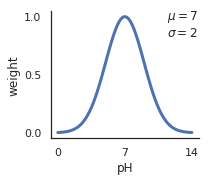

In [62]:
# plot the corresponding figure

import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.linspace(0, 14, num=100)

c = 7
w = 2

x = np.linspace(0, 14, num=100)
g = sns.relplot(x=x, y=norm.pdf(x, loc=c, scale=w) / norm.pdf(7,c,w),
                kind='line', aspect=1.2, lw=3, alpha=1, height=2.4)
g.set(xlabel='pH', ylabel='weight', xticks=[0,7,14], yticks=[0,.5, 1])
#g.fig.suptitle('$µ=7$, $σ=2$')
plt.annotate('$µ=7$\n$σ=2$', xy=(.95, .95),
             xycoords='figure fraction',
             va='top', ha='right')

g.savefig(wd / 'plots' / 'gaussian_weights.png', dpi=300)


### import some embeddings

In [42]:
import h5py
import numpy as np

embeddings = dict()
with h5py.File(wd / 'all_sequences_prothermdb_HALF.h5', 'r') as f:
    for key in f.keys():
        pieces = key.split('_')
        uniprot_id, variant = pieces[0], '_'.join(pieces[1:])

        if not variant:
            variant = 'wt'

        if uniprot_id not in embeddings:
            embeddings[uniprot_id] = dict()

        embeddings[uniprot_id][variant] = np.array(f[key])
        # embeddings[key] = np.array(f[key])


In [43]:
print(list(embeddings.keys()))

['A0A060GYS1', 'A0A410ZNC6', 'A5H7H0', 'B8YLY0', 'D0WVP7', 'D4Z2G1', 'E5BBQ3', 'K0A689', 'O00095', 'O00189', 'O15020', 'O25949', 'O26594', 'O49003', 'O60880', 'O60885', 'O61594', 'O68541', 'O74035', 'O75400', 'O95295', 'O95363', 'O95571', 'P00004', 'P00025', 'P00044', 'P00094', 'P00099', 'P00157', 'P00171', 'P00173', 'P00183', 'P00257', 'P00268', 'P00282', 'P00441', 'P00445', 'P00509', 'P00558', 'P00560', 'P00563', 'P00592', 'P00593', 'P00644', 'P00648', 'P00651', 'P00698', 'P00711', 'P00712', 'P00720', 'P00749', 'P00750', 'P00782', 'P00807', 'P00811', 'P00883', 'P00889', 'P00912', 'P00918', 'P00929', 'P00942', 'P00943', 'P00952', 'P00974', 'P01006', 'P01008', 'P01009', 'P01012', 'P01051', 'P01053', 'P01236', 'P01241', 'P01308', 'P01584', 'P01593', 'P01857', 'P01868', 'P02417', 'P02522', 'P02549', 'P02625', 'P02633', 'P02640', 'P02647', 'P02649', 'P02689', 'P02693', 'P02730', 'P02751', 'P02753', 'P02754', 'P02833', 'P02925', 'P02945', 'P03023', 'P03034', 'P03040', 'P03050', 'P03051', '

In [49]:
embeddings['A0A410ZNC6']

{'wt': array([[ 1.564e-01, -1.744e-01,  1.076e-01, ...,  4.355e-01, -1.630e-01,
         -7.269e-02],
        [-2.025e-01, -1.913e-01, -1.885e-01, ...,  3.279e-01,  9.937e-02,
          2.975e-02],
        [ 5.963e-02, -1.986e-01, -8.873e-03, ...,  3.098e-01,  6.555e-02,
         -8.020e-02],
        ...,
        [ 1.299e-01,  3.052e-02,  7.504e-05, ..., -2.280e-02,  1.899e-01,
          3.397e-02],
        [-2.252e-01,  1.005e-02,  4.502e-01, ..., -5.176e-02,  5.859e-02,
          8.185e-02],
        [-7.454e-03,  2.267e-02,  3.586e-01, ...,  5.548e-02,  3.543e-02,
         -7.043e-02]], dtype=float16),
 '126A': array([[ 0.156   , -0.1738  ,  0.1061  , ...,  0.4358  , -0.1608  ,
         -0.0723  ],
        [-0.2023  , -0.1914  , -0.1919  , ...,  0.3284  ,  0.10144 ,
          0.03134 ],
        [ 0.05917 , -0.2001  , -0.01095 , ...,  0.31    ,  0.0662  ,
         -0.07874 ],
        ...,
        [ 0.1323  ,  0.03088 ,  0.001675, ..., -0.0237  ,  0.191   ,
          0.03436 ],
       

In [60]:
from sklearn import linear_model
reg = linear_model.LogisticRegression()

help(reg.fit)

# reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
#
# reg.coef_


Help on method fit in module sklearn.linear_model._logistic:

fit(X, y, sample_weight=None) method of sklearn.linear_model._logistic.LogisticRegression instance
    Fit the model according to the given training data.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    
    y : array-like of shape (n_samples,)
        Target vector relative to X.
    
    sample_weight : array-like of shape (n_samples,) default=None
        Array of weights that are assigned to individual samples.
        If not provided, then each sample is given unit weight.
    
        .. versionadded:: 0.17
           *sample_weight* support to LogisticRegression.
    
    Returns
    -------
    self
        Fitted estimator.
    
    Notes
    -----
    The SAGA solver supports both float64 and float32 bit arrays.



In [61]:

# TODO compute euclidean distance between two embeddings
# make this an additional column in the dataframe

df = data.dataframe_repeats_avg()
df.loc[df.UniProt_ID == 'A0A410ZNC6']
list(df.loc[df.UniProt_ID == 'A0A410ZNC6'].MUTATION)

df.describe()


,pH,MUT_COUNT,dtemp,ddg,h2o,LENGTH,REPEATS
count,10208.000000,10216.000000,4053.000000,1780.000000,4383.000000,10216.000000,10216.000000
mean,6.519137,1.309319,-1.987443,-0.647716,-0.206622,374.771535,1.427858
std,1.450521,0.939926,8.792287,2.079362,2.686712,1290.514089,1.000481
min,2.000000,1.000000,-53.000000,-23.210000,-12.230000,-1.000000,1.000000
25%,6.250000,1.000000,-5.500000,-1.500000,-1.892500,148.000000,1.000000
50%,7.000000,1.000000,-1.280000,-0.400000,-0.440000,227.000000,1.000000
75%,7.400000,1.000000,1.100000,0.400000,1.000000,396.000000,2.000000
max,11.000000,26.000000,51.200000,7.900000,22.390000,34350.000000,23.000000


In [7]:
# unify all three measurements ?
importlib.reload(prep)
df = data.dataframe_remerged()
df

,UniProt_ID,MUTATION,pH,MEASURE,METHOD,MUT_COUNT,DELTA,dtemp,ddg,h2o,DATASET,LENGTH,REPEATS,desc
0,B8YLY0,165E,7.2,CD,Thermal,1,dtemp,1.7,0.00,0.66,reduced_set,210,1,dtemp & h2o
1,B8YLY0,168P,7.2,CD,Thermal,1,dtemp,2.9,0.00,0.98,reduced_set,210,1,dtemp & h2o
2,B8YLY0,194P,7.2,CD,Thermal,1,dtemp,1.0,0.00,-0.25,reduced_set,210,1,dtemp & h2o
3,O49003,450A,7.0,CD,Thermal,1,dtemp,10.2,0.00,0.48,reduced_set,923,12,dtemp & h2o
4,O60885,420D,7.5,CD,Thermal,1,dtemp,-3.0,0.00,5.37,reduced_set,1362,1,dtemp & h2o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,R9S082,67A_24A,9.6,CD,Thermal,2,dtemp,0.8,-0.45,0.00,reduced_set,154,1,ddg & dtemp
2402,R9S082,68A,9.6,CD,Thermal,1,dtemp,-0.5,-0.30,0.00,reduced_set,154,1,ddg & dtemp
2403,R9S082,70A,11.0,DSC,Thermal,1,dtemp,-3.8,-1.20,0.00,reduced_set,154,1,ddg & dtemp
2404,R9S082,70V,11.0,DSC,Thermal,1,dtemp,-0.3,-0.10,0.00,reduced_set,154,1,ddg & dtemp


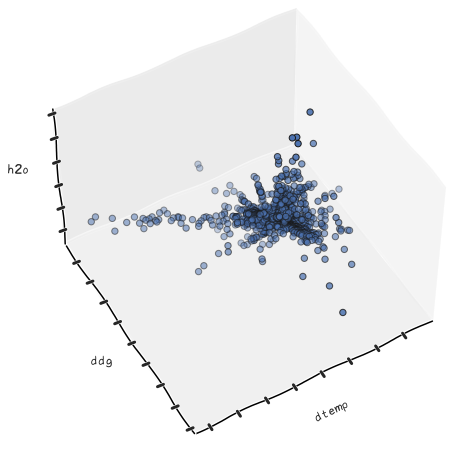

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

with plt.xkcd():
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-130, azim=120)
    ax.scatter(df.dtemp, df.ddg, df.h2o, #c=df.desc,
               cmap=plt.cm.Set1, edgecolor='k', s=40)
    #ax.set_title('First three PCA directions')
    ax.set_xlabel('dtemp')
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel('ddg')
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel('h2o')
    ax.w_zaxis.set_ticklabels([])



In [22]:
import plotly.express as px
fig = px.scatter_3d(df, x='dtemp', y='ddg', z='h2o', color='desc', template='simple_white')
fig.update_traces(mode='markers', marker_line_width=0, marker_size=4, opacity=.5)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=df.dtemp, y=df.ddg, z=df.h2o,
                    mode='markers', marker=dict(size=4, opacity=.6,
                                                color='rgba(244,22,100,0.6)'))])

fig.update_traces(mode='markers', marker_line_width=1, marker_size=4, opacity=.5)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  xaxis_title='bonk')
fig.show()



In [26]:
! jupyter nbconvert --execute --to html 3_merging_metrics.ipynb

[NbConvertApp] Converting notebook 3_merging_metrics.ipynb to html
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Writing 4245685 bytes to 3_merging_metrics.html
